In [3]:
import click
import numpy as np
import os

import tensorflow as tf
import tensorflow.contrib.eager as tfe

from PIL import Image, ImageDraw

from rpn import build_model, draw_bboxes
from resnet import resnet_v1_101

import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
tf.enable_eager_execution()

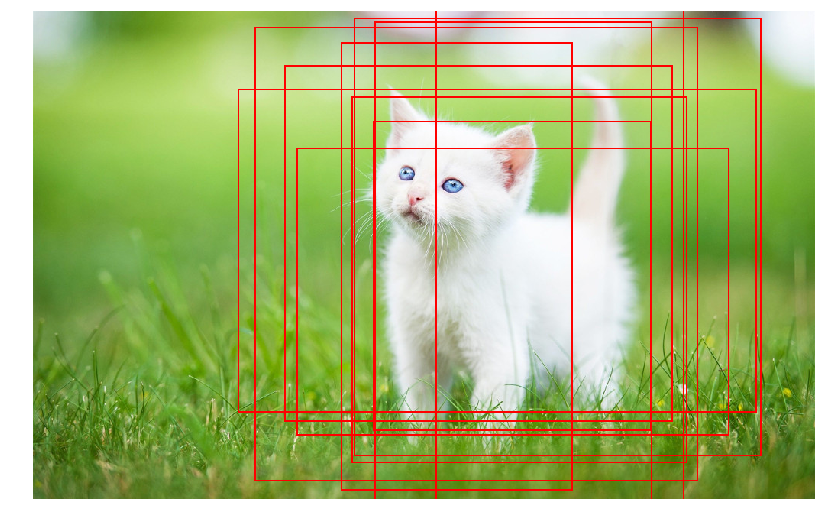

In [7]:
image_path = os.path.expanduser('~/images/cat.jpg')

raw_image = Image.open(image_path)
image = np.expand_dims(raw_image.convert('RGB'), axis=0)

with tfe.restore_variables_on_create('checkpoint/rpn'):
    result = build_model(image)

draw_bboxes(raw_image, result['proposals'][:10])

plt.figure(figsize=(14, 10))
plt.axis('off')
plt.imshow(raw_image)